# On random effects

Our usual imports

In [1]:
import numpy as np  # The array library
import numpy.linalg as npl  # The linear algebra sub-package
# Only show 4 decimals when printing
np.set_printoptions(precision=6)

import matplotlib.pyplot as plt
%matplotlib inline

## The example problem

Remember the scores of “psychopathy” from the 12 students:

In [2]:
psychopathy = [11.416,   4.514,  12.204,  14.835,
               8.416,   6.563,  17.343, 13.02,
               15.19 ,  11.902,  22.721,  22.324]

We found out these were students from Berkeley, Stanford and MIT.

Now let's say we have two students from Birmingham and two from Cambridge
(that's Birmingham and Cambridge UK, AKA *actual Birmingham* and *actual
Cambridge*).

Last time we just had one measurement of the psychopathy score, but this time
we have 40 measurements for each student - we did the questionnaire score
every week for 40 weeks.  Here's are the Birmingham student scores:

In [3]:
brum_0 = [9.25, 9.19, 9.26, 9.35, 9.18, 9.18, 9.36, 9.28, 9.15, 9.25, 9.15,
          9.15, 9.22, 9.01, 9.03, 9.14, 9.1, 9.23, 9.11, 9.06, 9.35, 9.18,
          9.21, 9.06, 9.15, 9.21, 9.08, 9.24, 9.14, 9.17, 9.14, 9.39, 9.2,
          9.09, 9.28, 9.08, 9.22, 9.0, 9.07, 9.22]
brum_1 = [8.94, 8.91, 8.89, 8.88, 8.83, 8.86, 8.88, 8.95, 8.92, 8.81, 8.92,
          8.88, 8.87, 8.93, 8.95, 8.95, 8.86, 8.88, 8.92, 8.95, 8.88, 8.89,
          8.84, 8.84, 8.94, 8.97, 8.9, 8.95, 8.92, 8.87, 8.92, 8.98, 8.9,
          8.98, 8.77, 8.94, 8.9, 8.89, 8.9, 8.8]

Here are the scores for the two Cambridge students:

In [4]:
cam_0 = [8.98, 9.03, 9.11, 8.96, 8.94, 8.96, 9.07, 9.02, 8.96, 9.04, 9.01,
         9.07, 8.95, 8.98, 8.97, 8.89, 9.02, 9.02, 9.0, 8.98, 8.89, 8.97,
         8.97, 8.94, 8.99, 9.03, 9.14, 9.01, 9.02, 8.99, 8.86, 9.0, 9.0, 9.18,
         8.99, 9.02, 9.0, 8.91, 9.09, 9.06]
cam_1 = [9.37, 9.11, 9.46, 9.04, 9.34, 9.58, 9.1, 9.17, 9.26, 9.17, 9.02,
         9.26, 9.09, 9.32, 9.11, 9.48, 9.13, 9.2, 9.37, 9.07, 9.28, 9.45,
         9.01, 9.28, 9.29, 9.37, 9.06, 9.05, 9.33, 9.29, 9.29, 9.3, 9.15,
         9.28, 9.29, 9.14, 9.53, 9.32, 9.07, 9.35]

We can do a histogram of these scores one under the other, first the
Birmingham students, then the Cambridge students.

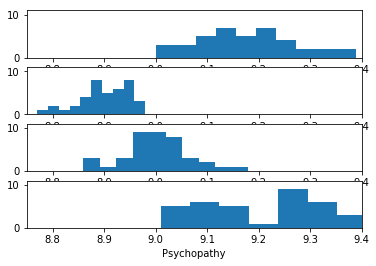

In [5]:
# Make four plots one under the other
fig, axes = plt.subplots(4, 1)
axes[0].hist(brum_0)
axes[1].hist(brum_1)
axes[2].hist(cam_0)
axes[3].hist(cam_1)
axes[3].set_xlabel('Psychopathy')
# Make sure the axes are the same for each plot
for ax in axes:
    ax.axis([8.75, 9.4, 0, 11])

Do you think there is a significant difference in psychopathy between
Birmingham students and Cambridge students?

We can use the machinery from the [GLM introduction](glm_intro) to do a t-test
on these values.

First we concatenate the data from all four students into one long vector:

In [6]:
psycho_repeats = np.concatenate([brum_0, brum_1, cam_0, cam_1])
len(psycho_repeats)

160

Next we make a design matrix for our General Linear Model.  We have two dummy
variables, and therefore two columns in the design matrix:

In [7]:
# Make an empty design matrix
N = len(psycho_repeats)
X = np.zeros((N, 2))

The first column indicates whether the psychopathy score is from a Birmingham
student or not.  There is a 1 corresponding to a value for a Birmingham
student, and 0 otherwise:

In [8]:
# First column (0) indicates Birmingham student value
X[:80, 0] = 1

The second column indicates whether the score is from a Cambridge student or
not:

In [9]:
# Second column (1) indicates Cambridge student value
X[80:, 1] = 1

Let's have a look at the design matrix:

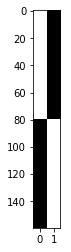

In [10]:
# Show design in grayscale
plt.imshow(X, cmap='gray', aspect=0.1)

You might remember that, when we fit this model in the simplest least-squares
way, the parameters are the means for the Birmingham and Cambridge values:

In [11]:
y = psycho_repeats
B = np.linalg.pinv(X).dot(y)
B

array([9.038625, 9.1225  ])

In [12]:
np.mean(brum_0 + brum_1)

9.038625

In [13]:
np.mean(cam_0 + cam_1)

9.122499999999999

Remember the t-test from the GLM page?

In [14]:
# Get t distribution code from scipy library
from scipy.stats import t as t_dist

In [15]:
def t_stat(y, X, c):
    """ betas, t statistic and significance test given data, design matrix, contrast

    This is OLS estimation; we assume the errors to have independent
    and identical normal distributions around zero for each $i$ in
    $\e_i$ (i.i.d).
    """
    # Make sure y, X, c are all arrays
    y = np.asarray(y)
    X = np.asarray(X)
    c = np.atleast_2d(c).T  # As column vector
    # Calculate the parameters - b hat
    beta = npl.pinv(X).dot(y)
    # The fitted values - y hat
    fitted = X.dot(beta)
    # Residual error
    errors = y - fitted
    # Residual sum of squares
    RSS = (errors**2).sum(axis=0)
    # Degrees of freedom is the number of observations n minus the number
    # of independent regressors we have used.  If all the regressor
    # columns in X are independent then the (matrix rank of X) == p
    # (where p the number of columns in X). If there is one column that
    # can be expressed as a linear sum of the other columns then
    # (matrix rank of X) will be p - 1 - and so on.
    df = X.shape[0] - npl.matrix_rank(X)
    # Mean residual sum of squares
    MRSS = RSS / df
    # calculate bottom half of t statistic
    SE = np.sqrt(MRSS * c.T.dot(npl.pinv(X.T.dot(X)).dot(c)))
    t = c.T.dot(beta) / SE
    # Get p value for t value using cumulative density dunction
    # (CDF) of t distribution
    ltp = t_dist.cdf(t, df) # lower tail p
    p = 1 - ltp # upper tail p
    return beta, t, df, p

Here is a t-test, testing the null hypothesis that the mean of the Birmingham
psychopathy values is the same as mean of the Cambridge psychopathy values:

In [16]:
betas, t_value, df, p_value = t_stat(y, X, [-1, 1])
betas

array([9.038625, 9.1225  ])

In [17]:
t_value

array([[3.250658]])

In [18]:
df

158

In [19]:
p_value

array([[0.000704]])

It's highly significant.  Do you find that surprising?

Let's do a different test.  This time I will take the mean for each student,
and throw away all individual observations.  I'll refer to this as the *Random
Effects* test.

In [20]:
y = [np.mean(brum_0), np.mean(brum_1), np.mean(cam_0), np.mean(cam_1)]
y

[9.17825, 8.899, 9.0005, 9.244499999999999]

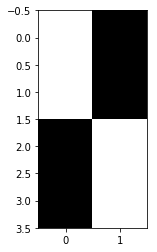

In [21]:
N = len(y)
X = np.zeros((N, 2))
# Birmingham students
X[:2, 0] = 1
# Cambridge students
X[2:, 1] = 1
plt.imshow(X, cmap='gray')

When we do the t-test, our parameters and t value are exactly the same.  Why?
(Clue - there are the same number of psychopathy values for each student).

In [22]:
re_betas, re_t_value, re_df, re_p_value = t_stat(y, X, [-1, 1])
re_betas

array([9.038625, 9.1225  ])

In [23]:
re_t_value

array([[0.452361]])

Our degrees of freedom and p value are very different:

In [24]:
re_df

2

In [25]:
re_p_value

array([[0.347669]])

Which do you think is the better p-value - the original - or the random
effects p value?

We used the mean for each student, but looking at the histograms above, there
seems to be some extra information in the distributions.  Some students have
less spread in their psychopathy scores than others.  Therefore, the mean of
their scores will be a more accurate measure of the actual (over the long
term) psychopathy scores for that student.  Can we use that information
somehow?